In [23]:
#Import Library

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression  
from sklearn.preprocessing import LabelEncoder

In [24]:
#Load dataset
df = pd.read_csv(r'https://raw.githubusercontent.com/cvinnn/Data-Mining/refs/heads/main/Week%206/Adult%20income.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [25]:
#Explore dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [26]:
#Data Transformation
label_encoder = LabelEncoder()

df['workclass'] = label_encoder.fit_transform(df['workclass'])
df['education'] = label_encoder.fit_transform(df['education'])
df['marital-status'] = label_encoder.fit_transform(df['marital-status'])
df['occupation'] = label_encoder.fit_transform(df['occupation'])
df['relationship'] = label_encoder.fit_transform(df['relationship'])
df['race'] = label_encoder.fit_transform(df['race'])
df['gender'] = label_encoder.fit_transform(df['gender'])
df['native-country'] = label_encoder.fit_transform(df['native-country'])
df['income'] = label_encoder.fit_transform(df['income'])

df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,39,0
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,39,0
2,28,2,336951,7,12,2,11,0,4,1,0,0,40,39,1
3,44,4,160323,15,10,2,7,0,2,1,7688,0,40,39,1
4,18,0,103497,15,10,4,0,3,4,0,0,0,30,39,0


In [27]:
#Check if null
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [28]:
#Data preprosessing untuk memisahkan data
X = df.drop('income', axis=1)  
y = df['income']  

In [29]:
#Data training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Data Modeling

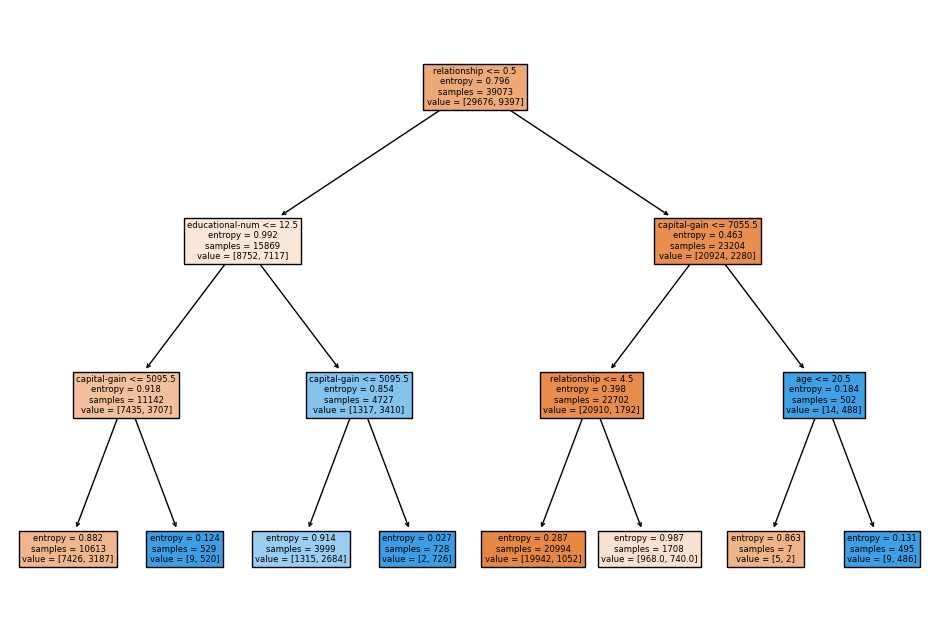

Akurasi (Entropy): 0.84
Akurasi pada data pelatihan (Entropy): 0.84


In [30]:
# Decision Tree untuk prediksi menggunakan model Decision Tree
dt_entropy = DecisionTreeClassifier(criterion='entropy',max_depth = 3, random_state=42)
dt_entropy.fit(X_train, y_train)
y_pred_entropy = dt_entropy.predict(X_test)

# Untuk Memunculkan Decision Treenya
plt.figure(figsize=(12, 8))
plt.title("Decision Tree (Entropy)")
plot_tree(dt_entropy, filled=True, feature_names=X.columns)
plt.show()

# Untuk Mengetahui Akurasi Algoritma Entropy
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print(f"Akurasi (Entropy): {accuracy_entropy:.2f}")

# Untuk Mengetahui Akurasi Pada Pelatihan Data Dengan Algoritma Entropy
train_accuracy_entropy = accuracy_score(y_train, dt_entropy.predict(X_train))
print(f"Akurasi pada data pelatihan (Entropy): {train_accuracy_entropy:.2f}")

In [31]:
# Naive Bayes untuk prediksi menggunakan model Naive Bayes
nb_model = GaussianNB()  
nb_model.fit(X_train, y_train)  
nb_predictions = nb_model.predict(X_test) 

# Untuk Mengetahui Akurasi Naive Bayes
accuracy_nb = accuracy_score(y_test, nb_predictions)  
print(f"Akurasi Naive Bayes: {accuracy_nb:.2f}")  

Akurasi Naive Bayes: 0.80


In [32]:
# Logistic Regression untuk prediksi menggunakan model Logistic Regression
lr_model = LogisticRegression(max_iter=200, random_state=42)  
lr_model.fit(X_train, y_train)  
lr_predictions = lr_model.predict(X_test)  

# Untuk Mengetahui Akurasi Logistic Regression  
accuracy_lr = accuracy_score(y_test, lr_predictions)  
print(f"Akurasi Logistic Regression: {accuracy_lr:.2f}")

Akurasi Logistic Regression: 0.81


c:\Users\Cevin-Predator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
